In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [2]:
ds = xr.load_dataset('../../data/Processed/psd_coare3p0_weight0_wave0.nc')

/ext3/miniconda3/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


In [4]:
split1 = [[69, 83, 78, 87, 72, 71, 68, 67, 73], [77], [77]] # metz
split2 = [[77, 69, 87, 83, 68, 73, 71], [67, 72, 78], [67, 72, 78]] # calwater, hiwings, neaqs
split3 = [[77, 69, 83, 87, 68, 67, 72, 78], [73, 71], [73, 71]] # capricorn, gasex
split4 = [[77, 67, 72, 73, 78, 71], [68, 83, 69, 87], [68, 83, 69, 87]] # dynamo, stratus, epic, whots
split_ensem = [split1, split2, split3, split4]

/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

3068
653
506
5846


/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/ext3/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

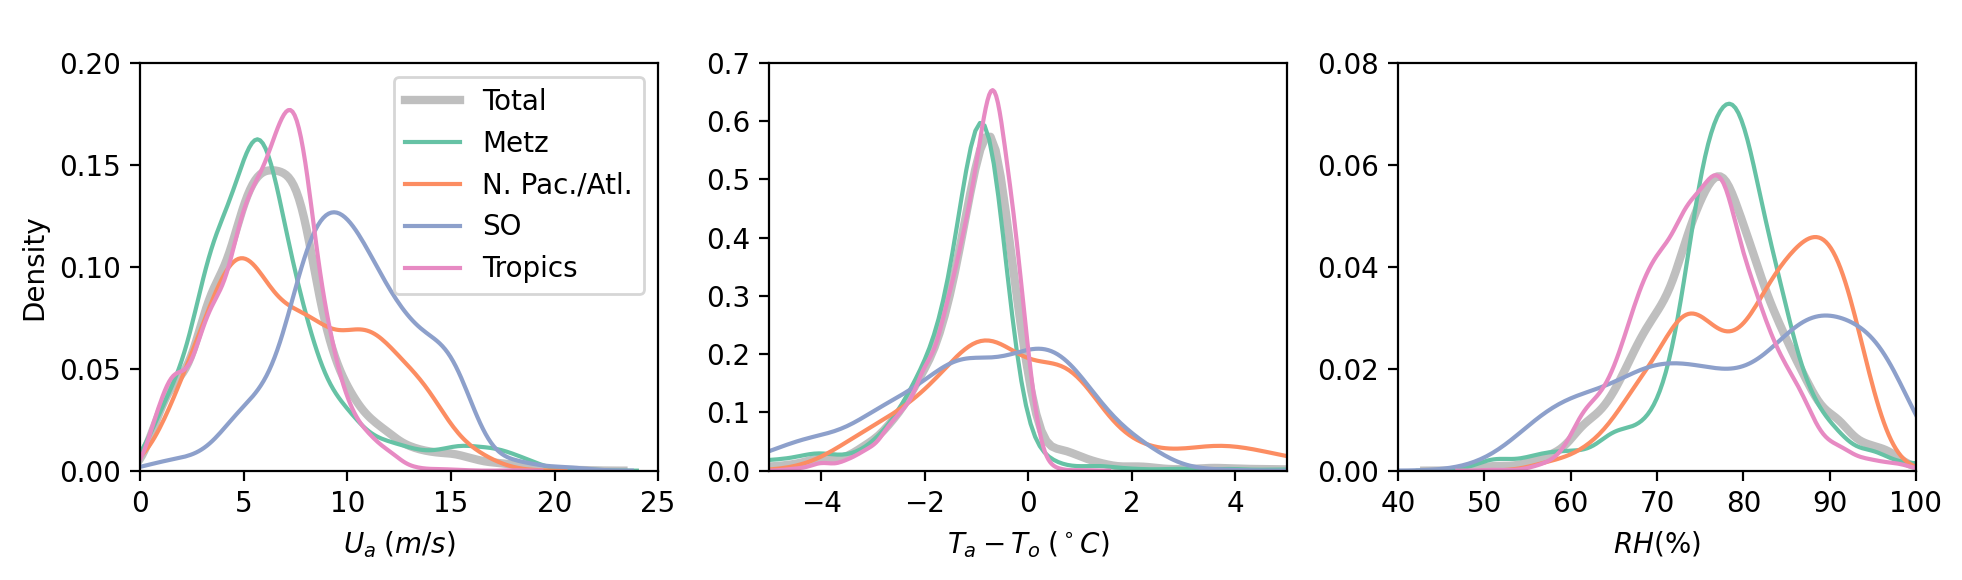

In [79]:
fig, axes = plt.subplots(1, 3, figsize=[10,3], dpi=200)
import seaborn as sns
from mlflux.datafunc import data_split_psd

labels = ['Metz', 'N. Pac./Atl.', 'SO', 'Tropics']
sns.kdeplot(ds.U, ax=axes[0], label='Total', c='gray', lw=3, alpha=0.5)
sns.kdeplot(ds.tair-ds.tsea, ax=axes[1], label='Total', c='gray', lw=3, alpha=0.5)
sns.kdeplot(ds.rh, ax=axes[2], label='Total', c='gray', lw=3, alpha=0.5)

for i in range(len(split_ensem)):
    training_ds, validating_ds, testing_ds = data_split_psd(ds, split=split_ensem[i], 
                                                            PLOT=False, XVIS='samples', VERBOSE=False)
    snumber = len(testing_ds.U.values)
    print (snumber)
    sns.kdeplot(testing_ds.U, ax=axes[0], label=labels[i], c=plt.get_cmap('Set2')(i))
    sns.kdeplot(testing_ds.tair-testing_ds.tsea, ax=axes[1], label=labels[i], c=plt.get_cmap('Set2')(i))
    sns.kdeplot(testing_ds.rh, ax=axes[2], label=labels[i], c=plt.get_cmap('Set2')(i))
    # xr.plot.hist(training_ds.U, bins=round(snumber/100), ax=axes[0], density=True, alpha=0.5, histtype='step', label=labels[i])
    # xr.plot.hist(training_ds.tsea-training_ds.tair, bins=round(snumber/100), ax=axes[1], density=True, alpha=0.5, histtype='step')
    # xr.plot.hist(training_ds.rh, bins=round(snumber/100), ax=axes[2], density=True, alpha=0.5, histtype='step')
    # xr.plot.hist(training_ds.U, bins=round(snumber/100), ax=axes[0], alpha=0.5, histtype='step', label=labels[i])
    # xr.plot.hist(training_ds.tsea-training_ds.tair, bins=round(snumber/100), ax=axes[1], alpha=0.5, histtype='step')
    # xr.plot.hist(training_ds.rh, bins=round(snumber/100), ax=axes[2], alpha=0.5, histtype='step')

axes[0].set_xlabel(r'$U_a \; (m/s)$'); axes[0].legend()
axes[0].set_title(' '); axes[0].set_xlim([0,25]); axes[0].set_ylim([0,0.2])
axes[1].set_xlabel(r'$T_a - T_o \; (^\circ C)$'); axes[1].set_ylabel('')
axes[1].set_title(' '); axes[1].set_xlim([-5,5]); axes[1].set_ylim([0,0.7])
axes[2].set_xlabel(r'$RH (\%)$'); axes[2].set_ylabel('')
axes[2].set_title(' '); axes[2].set_xlim([40,100]); axes[2].set_ylim([0,0.08])

plt.tight_layout()
fig.savefig(f'../../plots/distribution.png', bbox_inches='tight')

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  2.,  2.,  6.,  2., 11., 13., 18., 25., 43., 39., 46.,
        47., 47., 44., 36., 34., 38., 14., 15., 17.,  6.,  6., 10.,  5.,
         2.]),
 array([-260.63      , -254.13133332, -247.63266665, -241.13399997,
        -234.6353333 , -228.13666663, -221.63799995, -215.13933328,
        -208.6406666 , -202.14199992, -195.64333325, -189.14466658,
        -182.6459999 , -176.14733323, -169.64866655, -163.14999987,
        -156.6513332 , -150.15266653, -143.65399985, -137.15533318,
        -130.6566665 , -124.15799982, -117.65933315, -111.16066647,
        -104.6619998 ,  -98.16333313,  -91.66466645,  -85.16599977,
         -78.6673331 ,  -72.16866642,  -65.66999975,  -59.17133308,
         -52.6726664 ,  -46.17399972,  -39.67533305,  -33.17666637,
         -26.6779997 ,  -20.17933303,  -13.68066635,   -7.18199967,
          -0.683333  ]),
 <BarContainer object of 40 artists>)

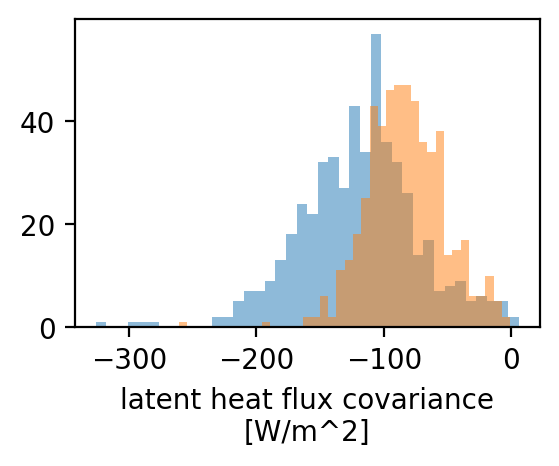

In [38]:
fig = plt.figure(figsize=[3,2], dpi=200)
ds_sub = ds.hlc.where((ds.U>8)&(ds.U<9)&(ds.rh>70)&(ds.rh<80))
ds_sub.plot.hist(bins=40, alpha=0.5)
ds_sub = ds.hlc.where((ds.U>4)&(ds.U<5)&(ds.rh>70)&(ds.rh<80))
ds_sub.plot.hist(bins=40, alpha=0.5)
# ds_sub = ds.taucx.where((ds.U>11)&(ds.U<12)&((ds.tair-ds.tsea)>0)&((ds.tair-ds.tsea)<1))
# ds_sub.plot.hist(bins=20)

/state/partition1/job-55003507/ipykernel_1682830/231138093.py:31: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)


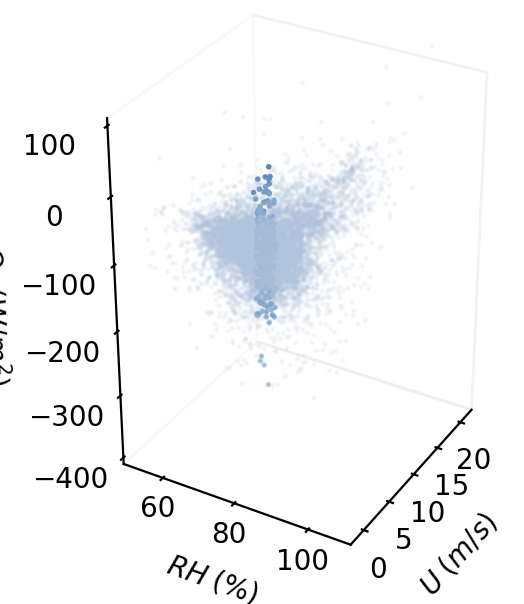

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=[2.5,5], dpi=200, constrained_layout=True)
ax = fig.add_subplot(projection='3d')
    
ax.scatter(ds.rh, ds.U, ds.hlc, marker='o', c='lightsteelblue', s=1, alpha=0.1)
ds_sub = ds.where((ds.U>8)&(ds.U<9)&(ds.rh>70)&(ds.rh<75))
# ds_sub = ds.where((ds.U>3)&(ds.U<3.5)&(ds.rh>65)&(ds.rh<70))
ax.scatter(ds_sub.rh, ds_sub.U, ds_sub.hlc, marker='o', c='steelblue', s=1)
# ds_sub = ds.where((ds.U>2)&(ds.U<2.5)&(ds.rh>80)&(ds.rh<85))
# ds_sub = ds.where((ds.U>4)&(ds.U<5)&(ds.rh>80)&(ds.rh<85))
# ax.scatter(ds_sub.rh, ds_sub.U, ds_sub.hlc, marker='o', c='steelblue', s=1)

ax.set_xlabel(r'$RH \; (\%)$', labelpad=-8); ax.set_xlim([50,110]); ax.set_xticks([60, 80, 100])
ax.set_ylabel(r'$U \; (m/s)$', labelpad=-5); ax.set_ylim([-2,22]); ax.set_yticks([0, 5, 10, 15, 20])
ax.set_zlabel(r'$Q_L \; (W/m^2)$', labelpad=4); ax.set_zlim([-400,100])
ax.tick_params(axis='x', pad=-5)
ax.tick_params(axis='y', pad=-3)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)
ax.zaxis.set_ticks_position('lower')
ax.zaxis.set_label_position('lower')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.0, 1.0, 2, 1.0]))

fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
fig.savefig(f'../../plots/points.pdf', bbox_inches='tight', pad_inches=1)

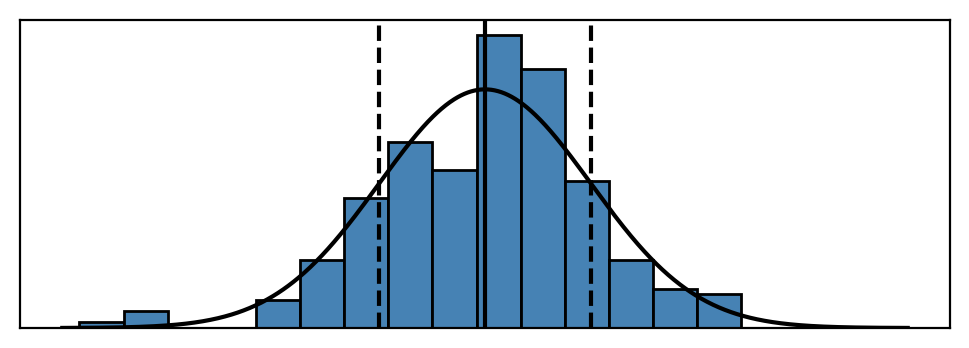

In [7]:
fig = plt.figure(figsize=[6,2], dpi=200); ax = plt.gca()
ds_sub = ds.where((ds.U>8)&(ds.U<9)&(ds.rh>70)&(ds.rh<75))
ds_sub.hlc.plot.hist(bins=15, density=True, edgecolor='black', color='steelblue')
plt.xlabel(''); plt.ylabel('')
# plt.ylim([0,60])
# plt.xlim([-300,0])

mu = ds_sub.hlc.mean().values
sigma = ds_sub.hlc.std().values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)
plt.axvline(ds_sub.hlc.mean(), c='k')
plt.axvline(ds_sub.hlc.mean() + ds_sub.hlc.std(), ls='--', c='k')
plt.axvline(ds_sub.hlc.mean() - ds_sub.hlc.std(), ls='--', c='k')
plt.plot(x, y, color='k', label='Gaussian')

ax.set_xticks([])
ax.set_yticks([])
fig.savefig(f'../../plots/data_dist.pdf', bbox_inches='tight')

/state/partition1/job-57725127/ipykernel_3567060/1124135268.py:52: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in leg.legendHandles:


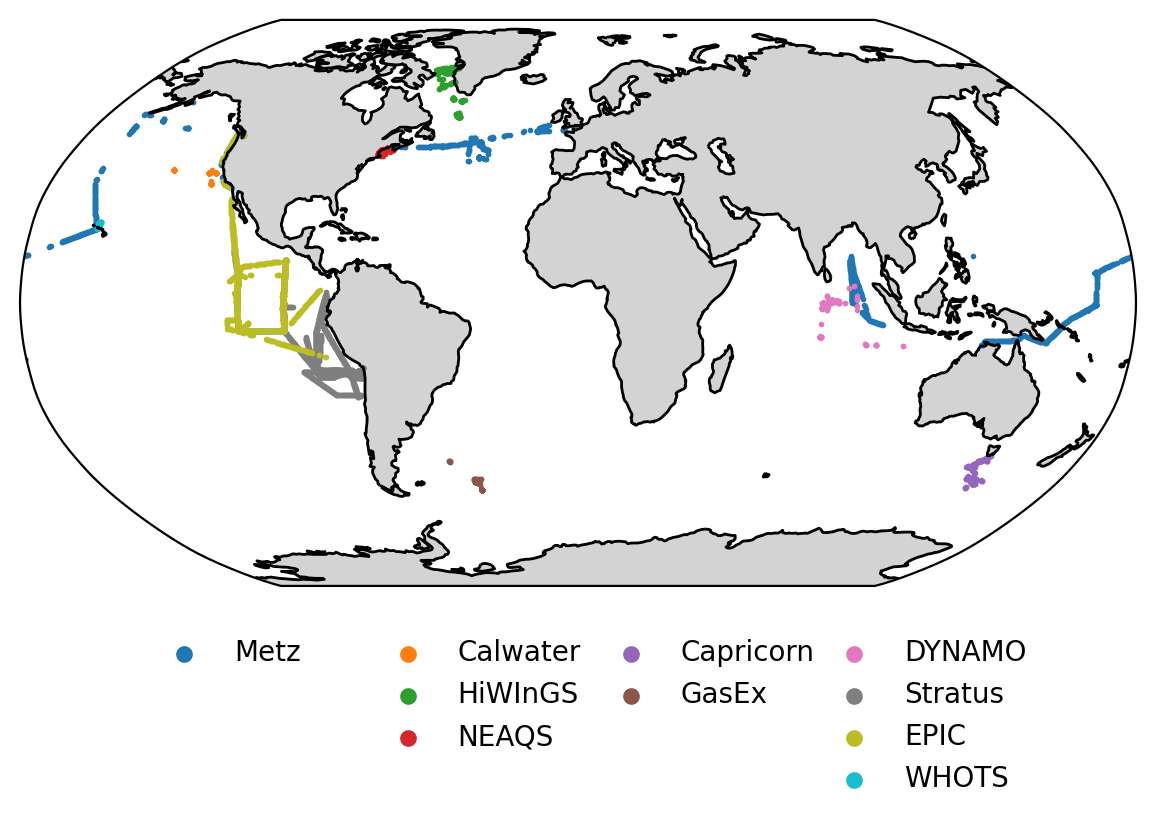

In [17]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import cm

pcodes = {'77':'Metz', '67':'Calwater', '72':'HiWInGS', '78':'NEAQS', '73':'Capricorn', '71':'GasEx', 
          '69':'EPIC', '87':'WHOTS', '83':'Stratus', '68':'DYNAMO'}

pcode_ordered = [77, 67, 72, 78, 73, 71, 68, 83, 69, 87]

fig = plt.figure(figsize=(8,5), dpi=200)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
# ax.stock_img()
# ax.add_feature(cfeature.LAND, color='gainsboro')  # Dry land in tan color
ax.add_feature(cfeature.LAND, color='lightgray')  # Dry land in tan color
# ax.add_feature(cfeature.LAND, color='linen')  # Dry land in tan color
ax.coastlines()
colors = cm.tab10(np.linspace(0, 1, 10))

lines = []
labels = []
for i, p in enumerate(pcode_ordered):
    idx = ds.pcode == p
    pcode = pcodes[str(int(p))]
    line = ax.scatter(ds.lon[idx], ds.lat[idx],
                    s=1, color=colors[i], label='{}'.format(pcode), transform=ccrs.PlateCarree())
    lines.append(line)
    labels.append('{}'.format(pcode))
    
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])


# First row with 3 items
legend1 = ax.legend(handles=lines[:1], labels=labels[:1], loc='upper left',
                    bbox_to_anchor=(0.1, -0.05), alignment='center', fontsize=10, ncol=1, frameon=False)
legend2 = ax.legend(handles=lines[1:4], labels=labels[1:4], loc='upper left',
                    bbox_to_anchor=(0.3, -0.05), alignment='center', fontsize=10, ncol=1, frameon=False)
legend3 = ax.legend(handles=lines[4:6], labels=labels[4:6], loc='upper left',
                    bbox_to_anchor=(0.5, -0.05), alignment='center', fontsize=10, ncol=1, frameon=False)
legend4 = ax.legend(handles=lines[6:10], labels=labels[6:10], loc='upper left',
                    bbox_to_anchor=(0.7, -0.05), alignment='center', fontsize=10, ncol=1, frameon=False)

# leg = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=False, ncol=2, fontsize=10)

ax.add_artist(legend1)
ax.add_artist(legend2)
ax.add_artist(legend3)

for leg in (legend1, legend2, legend3, legend4):
    for handle in leg.legendHandles:
        handle.set_sizes([25])

fig.savefig(f'../../plots/map.pdf', bbox_inches='tight')
fig.savefig(f'../../plots/map.png', bbox_inches='tight')